<a href="https://colab.research.google.com/github/priyal-khapra/Beginner-Projects-DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5] #flatenning the 2-d array into 1-d array 

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5] #flatenning the 2-d array into 1-d array 

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane" , "automobile" , "bird", "cat" ,"deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

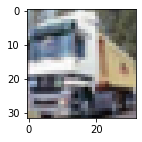

In [ ]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[1])

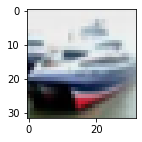

In [ ]:
plt.figure(figsize = (10,2))
plt.imshow(X_test[1])

In [ ]:
def plot_sample_with_label(X,y,index):
  plt.figure(figsize = (10,2))
  plt.imshow(X[index])
  print(classes[y[index]])

automobile


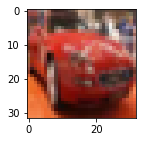

In [ ]:
plot_sample_with_label(X_train, y_train , 5)

frog


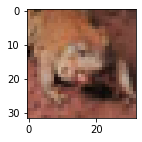

In [ ]:
plot_sample_with_label(X_test, y_test , 5)

In [ ]:
X_train.shape 

(50000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
# scaling the values
X_train = X_train / 255 
X_test = X_test / 255 

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
# first let's try creating a normal ANN to check and compare perfomances with CNN 
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = "relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10 , activation = "sigmoid")])
ann.compile(optimizer = "SGD",
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
ann.fit(X_train , y_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8139 - accuracy: 0.3527
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6223 - accuracy: 0.4284
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5421 - accuracy: 0.4574
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4798 - accuracy: 0.4807
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4306 - accuracy: 0.4957
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3875 - accuracy: 0.5113
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3494 - accuracy: 0.5276
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3152 - accuracy: 0.5380
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2812 - accuracy: 0.5491
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.249

In [ ]:
ann.evaluate(X_test , y_test)
# even after 50 epochs, the accuracy is still 0.563

313/313 [==============================] - 1s 3ms/step - loss: 1.5632 - accuracy: 0.5631


[1.563185214996338, 0.5630999803543091]

In [ ]:
 from sklearn.metrics import confusion_matrix, classification_report
 import numpy as np 
 y_pred = ann.predict(X_test)
 y_pred_classes = [np.argmax(element) for element in y_pred]
 print("classification_report : \n", classification_report(y_test,y_pred_classes))

classification_report : 
               precision    recall  f1-score   support

           0       0.62      0.65      0.64      1000
           1       0.63      0.72      0.67      1000
           2       0.39      0.56      0.46      1000
           3       0.38      0.45      0.41      1000
           4       0.64      0.33      0.43      1000
           5       0.50      0.42      0.46      1000
           6       0.58      0.68      0.62      1000
           7       0.71      0.58      0.64      1000
           8       0.71      0.66      0.69      1000
           9       0.62      0.57      0.59      1000

    accuracy                           0.56     10000
   macro avg       0.58      0.56      0.56     10000
weighted avg       0.58      0.56      0.56     10000



In [ ]:
# lets' create cnn now 
cnn = models.Sequential([
    #cnn 
    layers.Conv2D(filters = 32 , kernel_size=(3,3) , activation = "relu" , input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64 , kernel_size=(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [ ]:
cnn.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
early_stopping  = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
cnn.fit(X_train, y_train, epochs = 50, callbacks = early_stopping)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5686 - accuracy: 0.8009
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5235 - accuracy: 0.8164
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4906 - accuracy: 0.8268
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4611 - accuracy: 0.8349
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4339 - accuracy: 0.8461
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3983 - accuracy: 0.8578
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3749 - accuracy: 0.8679
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3444 - accuracy: 0.8753
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3288 - accuracy: 0.8829
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.301

In [ ]:
cnn.evaluate(X_test,y_test)
# accuracy has increased

313/313 [==============================] - 1s 3ms/step - loss: 3.3344 - accuracy: 0.6733


[3.33439302444458, 0.67330002784729]

In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)